# **Road accidents' forecast in Belgium**

## **I. Business Problem and Data Understanding**
In this section we will firstly discuss the problem that we face, and secondly we will describe the data set that we used to help us solve it.

### Purpose of the notebook
This notebook presents the results of the investigations on the probabilities of getting a road accident in Belgium and the severity likely to occur. Severity is defined in terms of fatality and casualties. This notebook would thus be useful for anyone owning a car, since one should be able to see whether it is a good idea to take her car under specific circumstances. The model is going to warn people when they should be more careful than normal, meaning that they should drive slower for instance or try to find an alternative to the car.

### Data set
The open data used for making the present analysis is gathered from the website of "Statbel", the Belgian statistical office. The data can be retrieve on the following link: https://statbel.fgov.be/en/open-data?category=162. It contains 655 467 observation (i.e. road accidents) and 35 attributes (among others day of the week, road type, build up area, type of collision, light conditions, municipality and district, number of deadly accidents in the last 30 days etc.).


In [107]:
#Import of libraries
#-------------------------------
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import of data set
#-------------------------------
df = pd.read_csv(r'C:\Users\NJ5866\Desktop\Road_accidents_Belgium.csv')
df.head(10)

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,TX_BUILD_UP_AREA_DESCR_FR,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,...,TX_PROV_DESCR_FR,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,27/09/2019,18,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,1.0,Kettingbotsing (4 bestuurders of meer),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,1,1,0,0,0
1,20/11/2019,12,3,Mercredi,woensdag,1.0,Binnen bebouwde kom,En agglomération,4.0,Langs opzij,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
2,15/07/2019,14,1,Lundi,maandag,1.0,Binnen bebouwde kom,En agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
3,20/04/2019,2,6,Samedi,zaterdag,2.0,Buiten bebouwde kom,Hors agglomération,1.0,Kettingbotsing (4 bestuurders of meer),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,1,0
4,25/10/2019,12,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,5.0,Met een voetganger,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
5,28/07/2019,21,7,Dimanche,zondag,2.0,Buiten bebouwde kom,Hors agglomération,7.0,Tegen een hindernis buiten de rijbaan,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
6,18/10/2019,17,5,Vendredi,vrijdag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
7,7/10/2019,13,1,Lundi,maandag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
8,29/06/2019,14,6,Samedi,zaterdag,2.0,Buiten bebouwde kom,Hors agglomération,3.0,Langs achteren (of naast elkaar),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
9,26/09/2019,6,4,Jeudi,donderdag,2.0,Buiten bebouwde kom,Hors agglomération,NaN,Niet beschikbaar,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1


As one might notice, some variables are simply translations of others (French and Dutch), so in order to avoid using twice the same variables, we can simplify our data set by removing one of the two columns for each of such variables. Arbitrarily, French has been chosen to be kept. Let's check all variable which need to be removed (column names ending with '_NL'). As one can see, 9 variables will be withdrawn.

In [102]:
df_accidents = df.drop(["TX_DAY_OF_WEEK_DESCR_NL", "TX_BUILD_UP_AREA_DESCR_NL", "TX_COLL_TYPE_DESCR_NL", "TX_LIGHT_COND_DESCR_NL", "TX_ROAD_TYPE_DESCR_NL", "TX_MUNTY_DESCR_NL", "TX_ADM_DSTR_DESCR_NL", "TX_PROV_DESCR_NL", "TX_RGN_DESCR_NL" ], axis=1)
df_accidents.shape

(655468, 26)

The new data set contains now 26 columns (and the same number of lines, i.e. 655 467 observations).  
A description of the variables is described, together with the data type needed, are described in the following table:

|Variable names               | Meaning                                              | Type of data required|
|-----------------------------| ----------------------------------------------------:|---------------------:|
|DT_DAY                       | Date of the accident                                 | Date                 |
|DT_HOUR                      | Hour of the accident                                 | Categorical (1-24)   |
|CD_DAY_OF_WEEK               | Day of week of the accident (1 to 7)                 | Categorical (1-7)    |
|TX_DAY_OF_WEEK_DESCR_FR      | Day of week of the accident in French                | Categorical          |
|CD_BUILD_UP_AREA             | Code of buildup area: 1 = urban area, 2 = extra-urban| Categorical (1-2)    |
|TX_BUILD_UP_AREA_DESCR_FR    | Name of buildup area in French                       | Categorical          |
|CD_COLL_TYPE                 | Type of collision code                               | Categorical (1-8)    |
|TX_COLL_TYPE_DESCR_FR        | Collision type name in French                        | Categorical          |
|CD_LIGHT_COND                | light conditions code                                | Categorical (1-4)    |
|TX_LIGHT_COND_DESCR_FR       | Description of light conditions in French            | Categorical          |
|CD_ROAD_TYPE                 | Road type code                                       | Categorical (1-2)    |
|TX_ROAD_TYPE_DESCR_FR        | Road type description in French                      | Categorical          |             
|CD_MUNTY_REFNIS              | NSI-code of the municipality                         | Categorical          |
|TX_MUNTY_DESCR_FR            | Municipality name in French                          | Categorical          |
|CD_DSTR_REFNIS               | NSI-code of the district                             | Categorical          |
|TX_ADM_DSTR_DESCR_FR         | Name of the district in French                       | Categorical          |
|CD_PROV_REFNIS               | NSI-code of the district                             | Categorical          |
|TX_PROV_DESCR_FR             | Name of the province in French                       | Categorical          |
|CD_RGN_REFNIS                | NSI-code of the region                               | Categorical          |
|TX_RGN_DESCR_FR              | Name of the region in French                         | Categorical          |
|MS_ACCT                      | Number of accidents with dead or injured             | Integer              |
|MS_ACCT_WITH_DEAD            | Number of accidents with dead                        | Integer              |
|MS_ACCT_WITH_DEAD_30_DAYS    | Number of accidents with dead, over the last 30 days | Integer              |
|MS_ACCT_WITH_MORY_INJ        | Number of accidents with mortally injured            | Integer              |
|MS_ACCT_WITH_SERLY_INJ       | Number of accidents with severely injured            | Integer              |
|MS_ACCT_WITH_SLY_INJ         | Number of accidents with slightly injured            | Integer              |

Let's now convert the type of some variables (e.g. DT_DAY to datetime, DT_HOUR to categorical...)

In [103]:
# DT_DAY typecasting to datetime
df_accidents['DT_DAY'] = pd.to_datetime(df_accidents['DT_DAY'])

In [104]:
#Changing the dataframe to the right data formats: lots of castings to categorical
categorical_variables = ['DT_HOUR', 'CD_DAY_OF_WEEK', 'CD_BUILD_UP_AREA', 'CD_COLL_TYPE', 'CD_LIGHT_COND', 'CD_ROAD_TYPE', 'CD_MUNTY_REFNIS', 'CD_DSTR_REFNIS', 'CD_PROV_REFNIS', 'CD_RGN_REFNIS']
df_cat = df_accidents[categorical_variables].astype('category')

df_accidents = pd.concat([df_accidents['DT_DAY'], df_cat, df_accidents[['MS_ACCT','MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'] ]], axis=1)

In [106]:
# Check that all variables are the same type as expected and described earlier
df_accidents.dtypes

DT_DAY                       datetime64[ns]
DT_HOUR                            category
CD_DAY_OF_WEEK                     category
CD_BUILD_UP_AREA                   category
CD_COLL_TYPE                       category
CD_LIGHT_COND                      category
CD_ROAD_TYPE                       category
CD_MUNTY_REFNIS                    category
CD_DSTR_REFNIS                     category
CD_PROV_REFNIS                     category
CD_RGN_REFNIS                      category
MS_ACCT                               int64
MS_ACCT_WITH_DEAD                     int64
MS_ACCT_WITH_DEAD_30_DAYS             int64
MS_ACCT_WITH_MORY_INJ                 int64
MS_ACCT_WITH_SERLY_INJ                int64
MS_ACCT_WITH_SLY_INJ                  int64
dtype: object

Now that all variables are well defined, we can thus now start the analyses.

## **II. Exploratory Data Analysis**

First of all, let's get acquainted with the data that we are dealing with. A first step is to check the distribution plot of the number of accidents that we have. From what we can see below, this is pretty well approximated by a normal distribution.

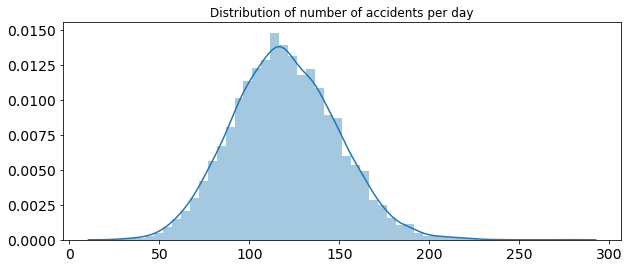

In [134]:
plt.figure(figsize=(10,4))
plt.title('Distribution of number of accidents per day')
plt.tick_params(labelsize=14)
sns.distplot(df_accidents.resample('D').size(), bins=50);

Now that we know how the accidents are distributed, it would be interesting to know how those accidents are evolving with time.
From what we can see below, there is a general trend of decreasing number of accidents with time (in years), while we can also guess some kind of seasonal effects. 

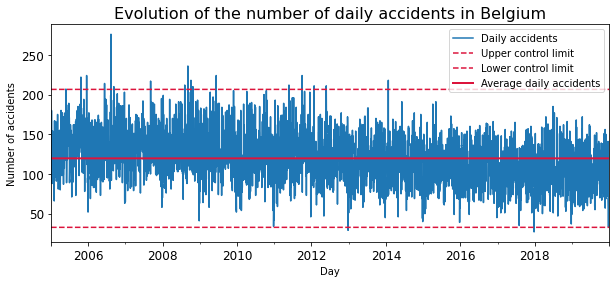

In [142]:
daily_accidents = pd.DataFrame(df_accidents.resample('D').size())
daily_accidents['MEAN'] = df_accidents.resample('D').size().mean()
daily_accidents['STD'] = df_accidents.resample('D').size().std()
upper_interval = daily_accidents['MEAN'] + 3 * accidents_daily['STD']
lower_interval = daily_accidents['MEAN'] - 3 * accidents_daily['STD']

plt.figure(figsize=(10,4))
df_accidents.resample('D').size().plot(label='Daily accidents')
upper_interval.plot(color='crimson', ls='--', linewidth=1.5, label='Upper control limit')
lower_interval.plot(color='crimson', ls='--', linewidth=1.5, label='Lower control limit')
accidents_daily['MEAN'].plot(color='crimson', linewidth=2, label='Average daily accidents')

plt.title('Evolution of the number of daily accidents in Belgium', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=12)
plt.legend(prop={'size':10})

In order to discover the links between time and the number of accidents, it has been decided to create some additional variables and to add them to our current dataset, namely the _DAY_, the _MONTH_, the _QUARTER_ and the _YEAR_. Then we chec

In [133]:
#Creation of new variables to be added to the data frame: 'DAY', 'MONTH', 'QUARTER' and 'YEAR' of the accident.
# This will allow us to check whether there exist general trends or seasonal effects for example.

df_accidents['DAY'] = df_accidents['DT_DAY'].apply(lambda date: date.day)
df_accidents['MONTH'] = df_accidents['DT_DAY'].apply(lambda date: date.month)
df_accidents['QUARTER'] = df_accidents['DT_DAY'].apply(lambda date: date.quarter)
df_accidents['YEAR'] = df_accidents['DT_DAY'].apply(lambda date: date.year)

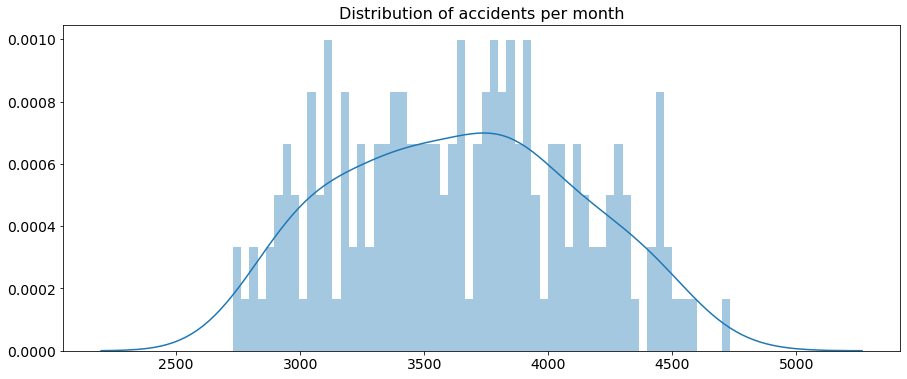

In [143]:
plt.figure(figsize=(15,6))
plt.title('Distribution of accidents per month', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_accidents.resample('M').size(), bins=60);

Main discoveries: 
1. The number of accidents is highly depending on the time of the day: As one can observe there are around 6 times more accidents at 18:00 compared to 3:00 in the morning.

2. 



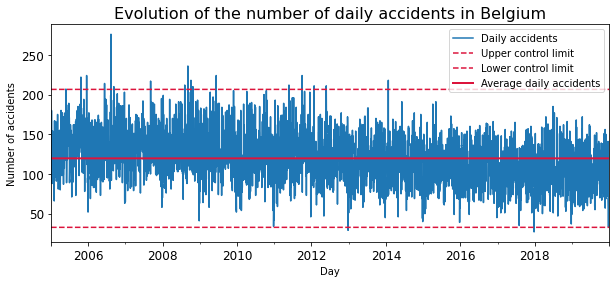

In [142]:
daily_accidents = pd.DataFrame(df_accidents.resample('D').size())
daily_accidents['MEAN'] = df_accidents.resample('D').size().mean()
daily_accidents['STD'] = df_accidents.resample('D').size().std()
upper_interval = daily_accidents['MEAN'] + 3 * accidents_daily['STD']
lower_interval = daily_accidents['MEAN'] - 3 * accidents_daily['STD']

plt.figure(figsize=(10,4))
df_accidents.resample('D').size().plot(label='Daily accidents')
upper_interval.plot(color='crimson', ls='--', linewidth=1.5, label='Upper control limit')
lower_interval.plot(color='crimson', ls='--', linewidth=1.5, label='Lower control limit')
accidents_daily['MEAN'].plot(color='crimson', linewidth=2, label='Average daily accidents')

plt.title('Evolution of the number of daily accidents in Belgium', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=12)
plt.legend(prop={'size':10})

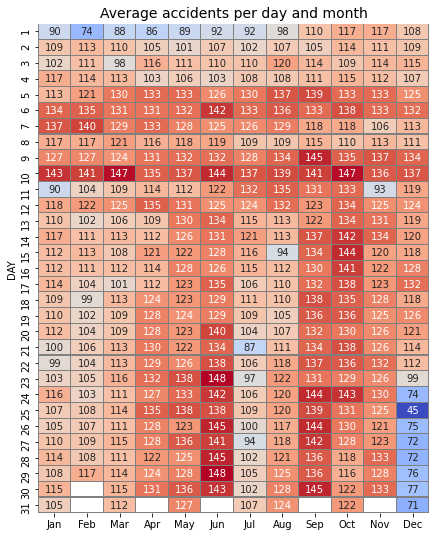

In [146]:
pivot = df_accidents.pivot_table(values='DT_DAY', index='DAY', columns='MONTH', aggfunc=len)
pivot_date_count = df_accidents.pivot_table(values='DT_DAY', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
avg_accidents = pivot/pivot_date_count
avg_accidents.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(7,9))
plt.title('Average accidents per day and month', fontsize=14)
sns.heatmap(avg_accidents.round(), cmap='coolwarm', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")